# Field of View (FOV) and Resolution

The image we create is fundamentally defined by the field-of-view (FOV) and spatial resolution captured.  These are determined by our k-space sampling pattern.

## Learning Goals

1. Describe how images are formed
    * Describe what determines the image FOV and resolution
1. Manipulate MRI sequence parameters to improve performance
    * Manipulate the gradients and k-space sampling to change the FOV and resolution



In [ ]:
% setup MRI-education-resources path and requirements
cd ../
startup

loading image
loading signal


## Field-of-View (FOV)

The FOV is determined by the sample spacing in k-space, with the simple relationship based on the sample spacing, $\Delta k$ as:

$$ FOV = \frac{1}{\Delta k}$$

For example, $FOV_{x} = \frac{1}{\Delta k_x}$

In [ ]:
% rectangular object to demonstrate FOV

N = 256;
kx = [-N/2+1:N/2]/N;
N_rect = N/4;
kdata = sinc(kx *N_rect).' * sinc(kx *N_rect);

rect_recon = ifft2c(kdata);

subplot(221)
imagesc(log(abs(kdata)), [0 max(log(abs(kdata(:)))))
colormap(gray), axis equal tight off
subplot(222)
imagesc(abs(rect_recon), [0 max(abs(rect_recon(:)))])
colormap(gray), axis equal tight off
title('Full FOV')

kdata2 = kdata;
kdata2(1:2:end,:) = 0;
kdata2(:,1:2:end) = 0;
rect_recon2 = ifft2c(kdata2);

figure
subplot(221)
imagesc(log(abs(kdata2)), [0 max(log(abs(kdata2(:))))])
colormap(gray), axis equal tight off
subplot(222)
imagesc(abs(rect_recon2), [0 max(abs(rect_recon2(:)))])
colormap(gray), axis equal tight off
title('Doubled \Delta k, Half FOV')

kdata3 = kdata;
kdata3(1:3:end,:) = 0;
kdata3(2:3:end,:) = 0;
kdata3(:,1:3:end) = 0;
kdata3(:,2:3:end) = 0;
rect_recon3 = ifft2c(kdata3);

figure
subplot(221)
imagesc(log(abs(kdata3)), [0 max(log(abs(kdata3(:))))])
colormap(gray), axis equal tight off
subplot(222)
imagesc(abs(rect_recon3), [0 max(abs(rect_recon3(:)))])
colormap(gray), axis equal tight off
title('Tripled \Delta k, One Third FOV')

Text(0.5, 1.0, '1/3 FOV image')

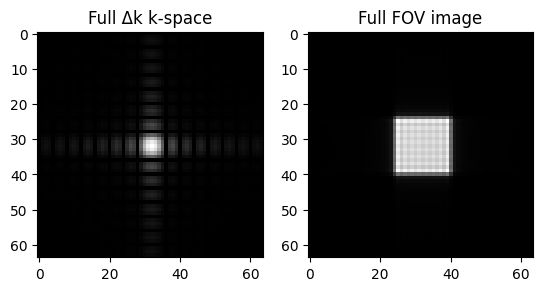

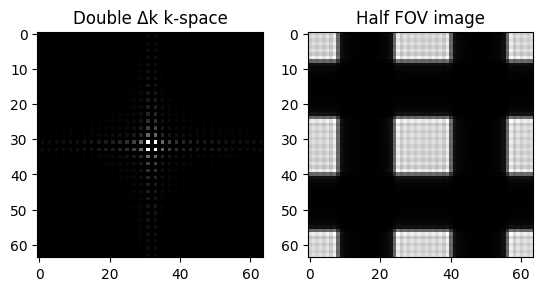

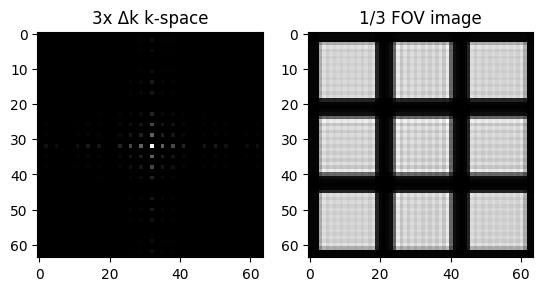

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# rectangular object to demonstrate FOV
N = 64
kx = np.arange(-N/2, N/2) / N
N_rect = N/4
kdata = np.outer(np.sinc(kx * N_rect), np.sinc(kx * N_rect))
rect_recon = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(kdata)))
plt.subplot(121)
plt.imshow(np.log(np.abs(kdata)+1), cmap='gray')
plt.title('Full Δk k-space')
plt.subplot(122)
plt.imshow(np.abs(rect_recon), cmap='gray')
plt.title('Full FOV image')

kdata2 = kdata.copy()
kdata2[::2, :] = 0
kdata2[:, ::2] = 0
rect_recon2 = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(kdata2)))
plt.figure()
plt.subplot(121)
plt.imshow(np.log(np.abs(kdata2)+1), cmap='gray')
plt.title('Double Δk k-space')
plt.subplot(122)
plt.imshow(np.abs(rect_recon2), cmap='gray')
plt.title('Half FOV image')


kdata3 = kdata.copy()
kdata3[::3, :] = 0
kdata3[1::3, :] = 0
kdata3[:, ::3] = 0
kdata3[:, 1::3] = 0
rect_recon3 = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(kdata3)))

plt.figure()
plt.subplot(121)
plt.imshow(np.log(np.abs(kdata3)+1), cmap='gray')
plt.title('3x Δk k-space')
plt.subplot(122)
plt.imshow(np.abs(rect_recon3), cmap='gray')
plt.title('1/3 FOV image')



## Spatial Resolution

The spatial resolution is determined by the maximum sample extent in k-space, with the simple relationship based on the maximum k-space sample locations, $k_{max}$ as:

$$ \delta = \frac{1}{2 k_{max}}$$

For example, $\delta_x = \frac{1}{2 k_{x,max}}$

Text(0.5, 1.0, '4x voxel sizes image')

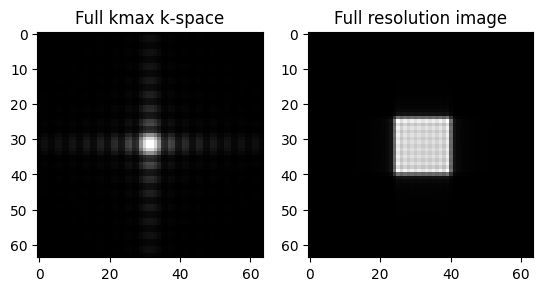

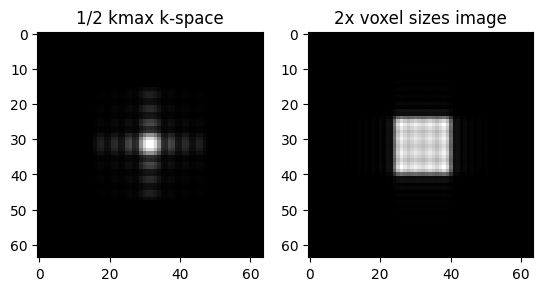

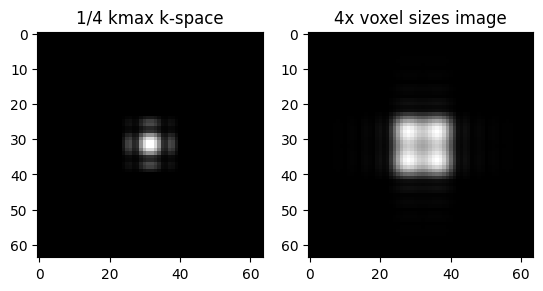

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# rectangular object to demonstrate resolution
N = 64
kx = np.arange(-N/2, N/2) / N
N_rect = N/4
kdata = np.outer(np.sinc(kx * N_rect), np.sinc(kx * N_rect))
rect_recon = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(kdata)))
plt.subplot(121)
plt.imshow(np.log(np.abs(kdata)+1), cmap='gray')
plt.title('Full kmax k-space')
plt.subplot(122)
plt.imshow(np.abs(rect_recon), cmap='gray')
plt.title('Full resolution image')


kdata2 = kdata.copy()
kdata2[np.arange(0, 1*N//4), :] = 0
kdata2[np.arange(3*N//4,N), :] = 0
kdata2[:,np.arange(0, 1*N//4)] = 0
kdata2[:,np.arange(3*N//4,N)] = 0
rect_recon2 = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(kdata2)))

plt.figure()
plt.subplot(121)
plt.imshow(np.log(np.abs(kdata2)+1), cmap='gray')
plt.title('1/2 kmax k-space')
plt.subplot(122)
plt.imshow(np.abs(rect_recon2), cmap='gray')
plt.title('2x voxel sizes image')


kdata4 = kdata.copy()
kdata4[np.arange(0, 3*N//8), :] = 0
kdata4[np.arange(5*N//8,N), :] = 0
kdata4[:,np.arange(0, 3*N//8)] = 0
kdata4[:,np.arange(5*N//8,N)] = 0
rect_recon4 = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(kdata4)))

plt.figure()
plt.subplot(121)
plt.imshow(np.log(np.abs(kdata4)+1), cmap='gray')
plt.title('1/4 kmax k-space')
plt.subplot(122)
plt.imshow(np.abs(rect_recon4), cmap='gray')
plt.title('4x voxel sizes image')




In [ ]:
% rectangular object to demonstrate resolution

N = 256;
kx = [-N/2+1:N/2]/N;
N_rect = N/2;
kdata = sinc(kx *N_rect).' * sinc(kx *N_rect);

rect_recon = ifft2c(kdata);

subplot(221)
imagesc(log(abs(kdata)), [0 max(log(abs(kdata(:))))])
colormap(gray), axis equal tight off
subplot(222)
imagesc(abs(rect_recon), [0 max(abs(rect_recon(:)))])
colormap(gray), axis equal tight off
title('Full Resolution')

kdata4 = kdata;
kdata4([[1:3*N/8],[5*N/8+1:N]],:) = 0;
kdata4(:,[[1:3*N/8],[5*N/8+1:N]]) = 0;
rect_recon4 = ifft2c(kdata4);

figure
subplot(221)
imagesc(log(abs(kdata4)), [0 max(log(abs(kdata4(:))))])
colormap(gray), axis equal tight off
subplot(222)
imagesc(abs(rect_recon4), [0 max(abs(rect_recon4(:)))])
colormap(gray), axis equal tight off
title('1/4 k_{max}, 4x voxel size')

kdata8 = kdata;
kdata8([[1:7*N/16],[9*N/16+1:N]],:) = 0;
kdata8(:,[[1:7*N/16],[9*N/16+1:N]]) = 0;
rect_recon8 = ifft2c(kdata8);

figure
subplot(221)
imagesc(log(abs(kdata8)), [0 max(log(abs(kdata8(:))))])
colormap(gray), axis equal tight off
subplot(222)
imagesc(abs(rect_recon8), [0 max(abs(rect_recon8(:)))])
colormap(gray), axis equal tight off
title('1/8 k_{max}, 8x voxel size')

